
--- OASIS Longitudinal Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  O

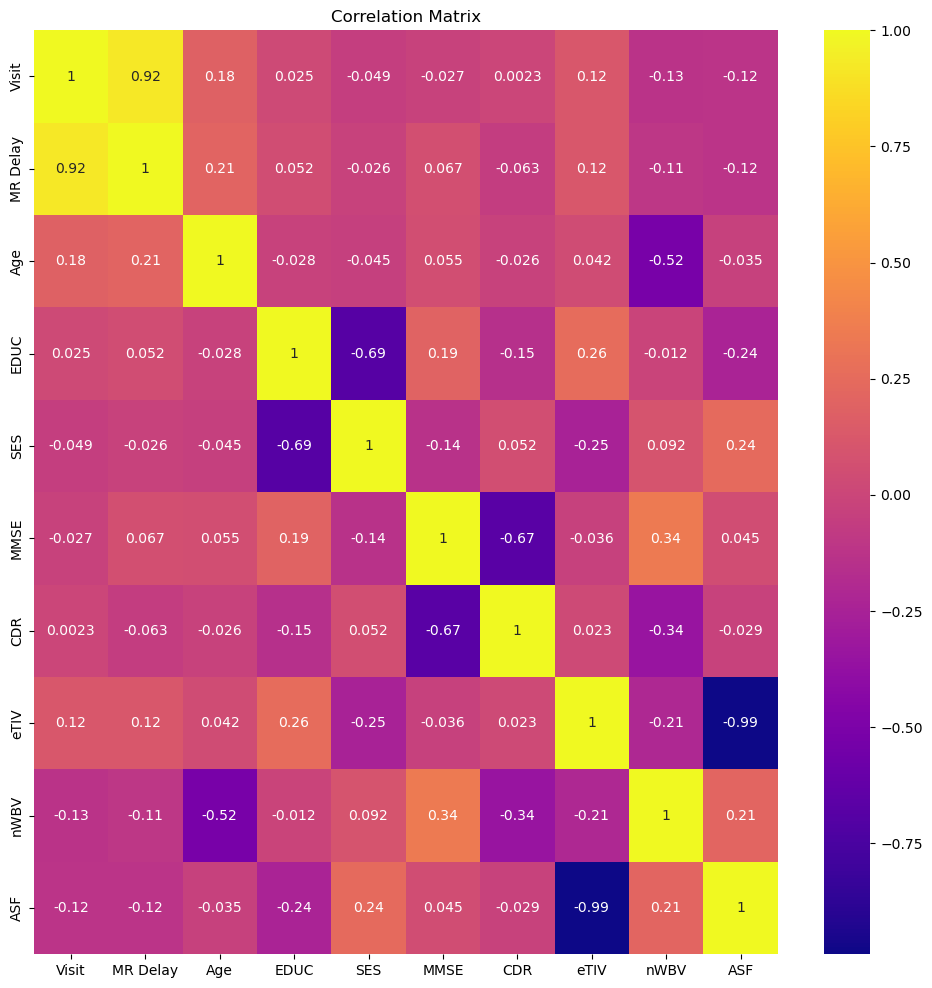

    M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV
0     M   87    14  2.0  27.0  0.0  1987  0.696
1     M   88    14  2.0  30.0  0.0  2004  0.681
2     M   75    12  2.0  23.0  0.5  1678  0.736
3     M   76    12  2.0  28.0  0.5  1738  0.713
4     M   80    12  2.0  22.0  0.5  1698  0.701
..   ..  ...   ...  ...   ...  ...   ...    ...
368   M   82    16  1.0  28.0  0.5  1693  0.694
369   M   86    16  1.0  26.0  0.5  1688  0.675
370   F   61    13  2.0  30.0  0.0  1319  0.801
371   F   63    13  2.0  30.0  0.0  1327  0.796
372   F   65    13  2.0  30.0  0.0  1333  0.801

[373 rows x 8 columns]


Fold 1: Train size = 238, Validation size = 60
Fold 2: Train size = 238, Validation size = 60
Fold 3: Train size = 238, Validation size = 60
Fold 4: Train size = 239, Validation size = 59
Fold 5: Train size = 239, Validation size = 59
['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'target']

Decision Tree Cross-Validation Results:


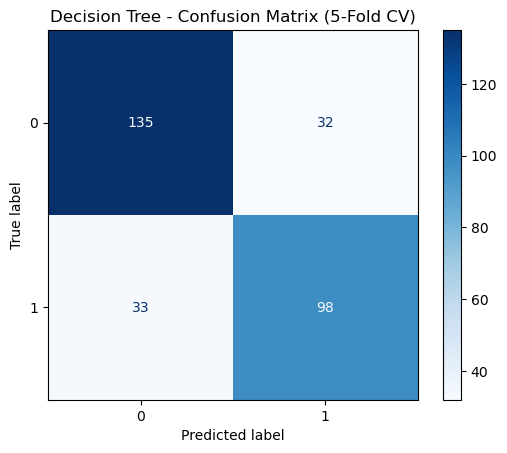


SVM Cross-Validation Results:


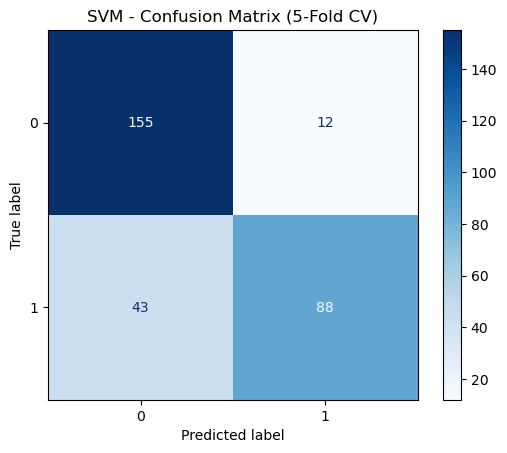


Random Forest Cross-Validation Results:


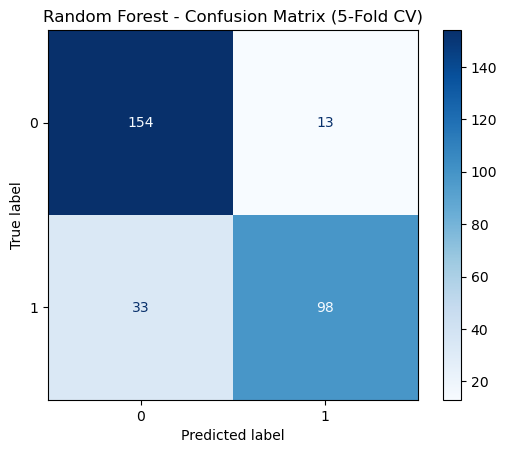


XGBoost Cross-Validation Results:


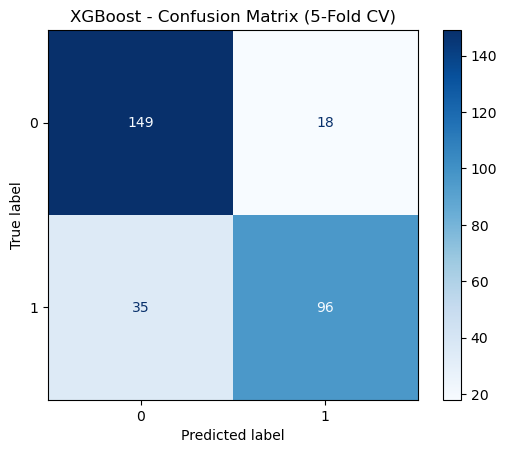


Voting Classifier Cross-Validation Results:


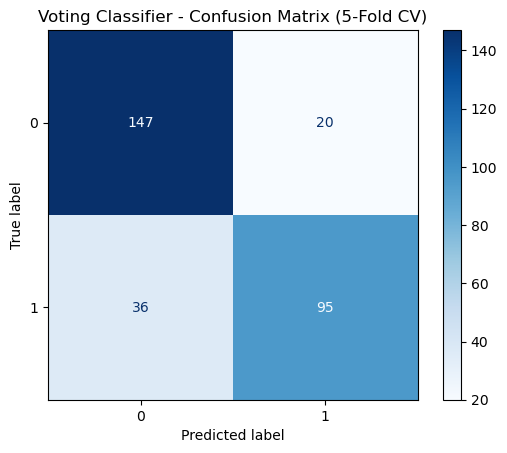


=== Cross-Validation Summary Metrics ===
                   Accuracy  Precision  Recall  F1 Score
Model                                                   
Decision Tree        0.7818     0.7902  0.7818    0.7811
SVM                  0.8154     0.8283  0.8154    0.8109
Random Forest        0.8455     0.8529  0.8455    0.8436
XGBoost              0.8220     0.8258  0.8220    0.8201
Voting Classifier    0.8120     0.8179  0.8120    0.8103


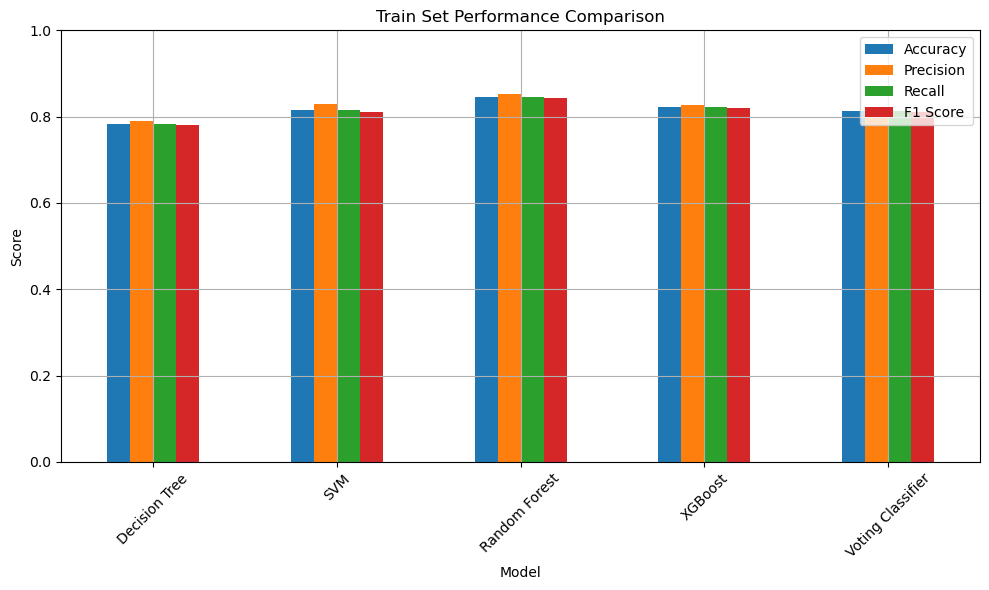


Decision Tree Test Set Evaluation:


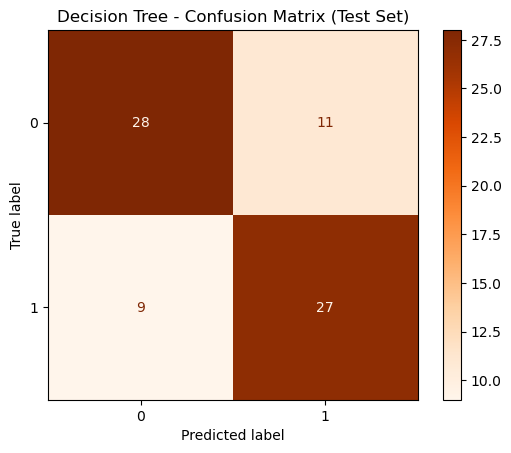


SVM Test Set Evaluation:


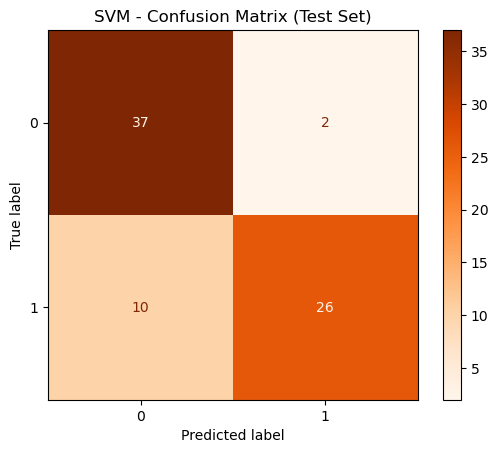


Random Forest Test Set Evaluation:


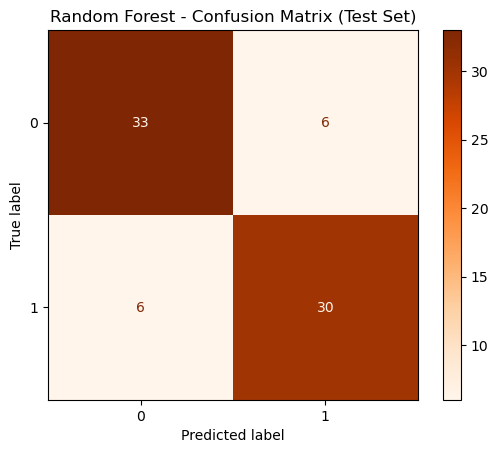


XGBoost Test Set Evaluation:


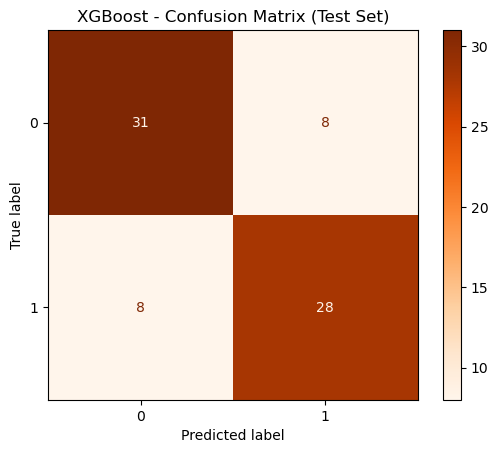


Voting Classifier Test Set Evaluation:


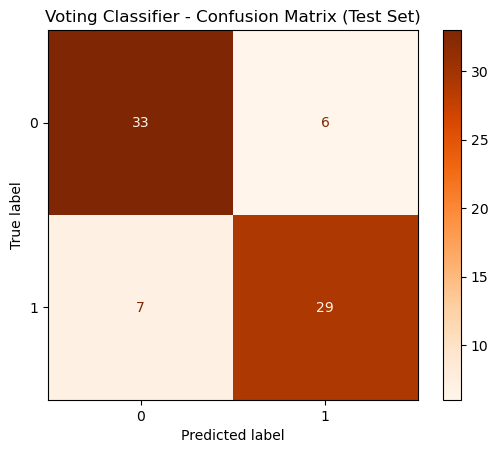


=== Test Set Performance Summary ===
                   Accuracy  Precision  Recall  F1 Score
Model                                                   
Decision Tree        0.7333     0.7346  0.7333    0.7334
SVM                  0.8400     0.8551  0.8400    0.8374
Random Forest        0.8400     0.8400  0.8400    0.8400
XGBoost              0.7867     0.7867  0.7867    0.7867
Voting Classifier    0.8267     0.8267  0.8267    0.8265


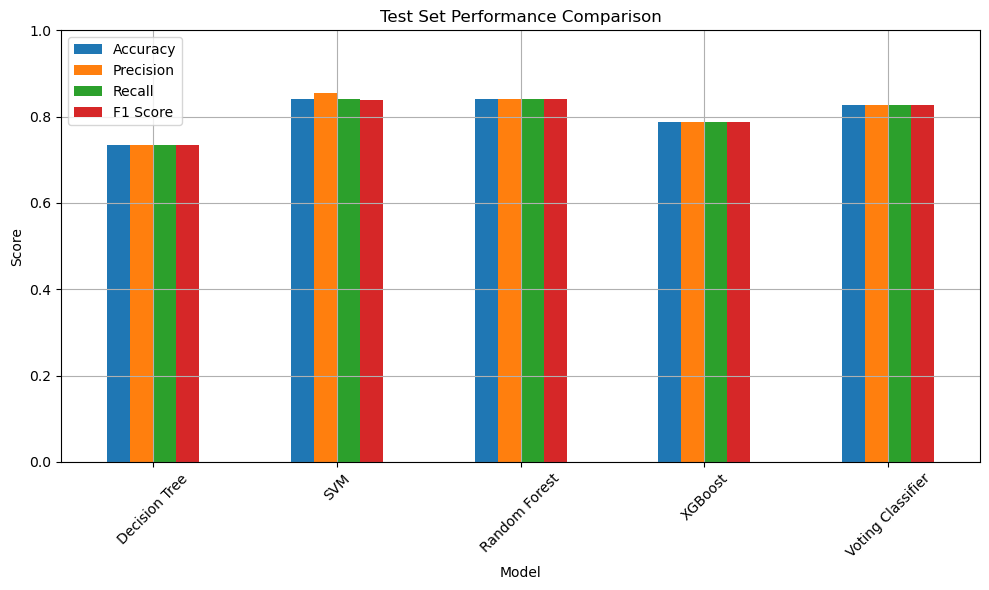

In [15]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay


# Load datasets
#cross_df = pd.read_csv('C:/Users/nsnav/Downloads/archive/oasis_cross-sectional.csv')
long_df = pd.read_csv('C:/Users/nsnav/Downloads/archive/oasis_longitudinal.csv')

# Data Structure(Type) and Descriptive measurement of data
def dataset_overview(df, name):
    print(f"\n--- {name} Dataset Overview ---")
    print(df.info())
    #print(df.describe(include='all'))
    print(df.head())



#  count for categorical variables
def categorical_summary(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\n--- Value Counts for {col} ---")
        print(df[col].value_counts())


#Finding Null values

dataset_overview(long_df, "OASIS Longitudinal")

print("\n")
print("oasis_longitudinal: ")
print("\n")
print(long_df.isna().sum())

print("\n")

# imputing missing value in SES with median

long_df['SES']=long_df['SES'].fillna((long_df['SES'].median()))

# imputing missing value in MMSE with median

long_df['MMSE']=long_df['MMSE'].fillna((long_df['MMSE'].median()))

print("\n")

print("oasis_longitudinal:Null Value count after replacing with median ")

print("\n")

long_df1 = long_df.copy()

null_counts = long_df.isna().sum()
print(null_counts)


print("\n")

#For checking the missing values replaced or not.

print(long_df1)

print("\n")

long_df1.describe()

print("\n")

#Finding Correlation cofficent for feature selection
correlation_matrix = long_df1.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

# Age distribution for Demented vs Non-demented
long_df1['target'] = long_df1['CDR'].apply(lambda x: 0 if x == 0 else 1)
plt.figure(figsize=(8, 5))
sns.histplot(data=long_df1, x="Age", hue="target", multiple="stack", bins=10, palette="coolwarm")
plt.title("Age Distribution: Demented vs Non-Demented")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Target (0=Non-demented, 1=Demented)")
plt.show()

# Gender vs Dementia
plt.figure(figsize=(6, 4))
sns.countplot(data=long_df1, x="M/F", hue="CDR")
plt.title("Gender vs Dementia Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="CDR (0=Non-demented, >0=Demented)")
plt.show()
# Remove columns 'Subject ID' , ''MRI ID' ,'MR Delay' , 'Visit' ,'Group', 'ASF' and 'Hand' and stored that in a new dataset frame
long_df2 = long_df1.drop(columns=['Subject ID', 'MRI ID', 'Hand', 'MR Delay', 'Group', 'Visit', 'ASF'])

print(long_df2)

print("\n")


# Split data into 80% train
train_data, test_data = train_test_split(long_df2, train_size=0.8, random_state=42)


train_data = train_data[train_data['CDR'].isin([0, 0.5, 1,2])]

# Condition applied for target
train_data['target'] = train_data['CDR'].apply(lambda x: 0 if x == 0 else 1)

#  Define the predictors 
X = train_data[['M/F','Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']]
# Convert categorical variable 'M/F' to numeric
X = pd.get_dummies(X, columns=['M/F'], drop_first=True)

#Defining the target
y=train_data['target']

# Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#  iterate through splits
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    print(f"Fold {fold}: Train size = {len(X_train)}, Validation size = {len(X_val)}")

print(train_data.columns.tolist())

# Define models
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)

#svm = SVC(probability=True, random_state=42)

#For improving SVM performance , Scaling is done.

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))])
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier( eval_metric='mlogloss', random_state=42)

# Voting classifier (soft voting to consider predicted probabilities)
voting_clf = VotingClassifier(estimators=[
    ('DT', dt),
    ('SVM', svm),
    ('RF', rf),
    ('XGB', xgb)
], voting='soft', weights=[1, 2, 2, 1])  #for improving voting classifier performance weights are added.

# Store all ML models for loop
models = {
    'Decision Tree': dt,
    'SVM': svm,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Voting Classifier': voting_clf
}



# For storing model performance
summary_metrics = []

for name, model in models.items():
    print(f"\n{name} Cross-Validation Results:")

    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    all_y_true = []
    all_y_pred = []

    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_val, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)

        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

    # Collect average metrics for this model
    summary_metrics.append({
        'Model': name,
        'Accuracy': np.mean(accuracies),
        'Precision': np.mean(precisions),
        'Recall': np.mean(recalls),
        'F1 Score': np.mean(f1s)
    })

    # Plot Confusion Matrix
    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix (5-Fold CV)")
    plt.show()





  # Convert to DataFrame
metrics_df = pd.DataFrame(summary_metrics)

# Set ML model name as index
metrics_df.set_index('Model', inplace=True)

# Round the values for clarity
metrics_df = metrics_df.round(4)

# Show the DataFrame (Performance Comparison for all Five ML models)
print("\n=== Cross-Validation Summary Metrics ===")
print(metrics_df)

# Plot performance comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Train Set Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





#  Evaluate All Models on Test Set 

# Prepare X_test with same processing as training data
X_test = test_data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV']]
X_test = pd.get_dummies(X_test, columns=['M/F'], drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)  

# Define y_test
y_test = test_data['CDR'].apply(lambda x: 0 if x == 0 else 1)

# Store test metrics
test_metrics = []

for name, model in models.items():
    print(f"\n{name} Test Set Evaluation:")

    # Fit on full training data
    model.fit(X, y)

    # Predict on test data
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    # Append results
    test_metrics.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Oranges')
    plt.title(f"{name} - Confusion Matrix (Test Set)")
    plt.show()

# Convert test results to DataFrame
test_metrics_df = pd.DataFrame(test_metrics)
test_metrics_df.set_index('Model', inplace=True)
test_metrics_df = test_metrics_df.round(4)

# Print test summary table
print("\n=== Test Set Performance Summary ===")
print(test_metrics_df)

# Plot performance comparison
test_metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Test Set Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Generate the profiling reports
#profile_cross = ProfileReport(cross_df, title="OASIS Cross-Sectional EDA Report", explorative=True)
#profile_long = ProfileReport(long_df, title="OASIS Longitudinal EDA Report", explorative=True)

#Path for saving HTML report
#report_path = "C:/Users/nsnav/OneDrive/Documents/DTU_MBA_DSA/Term-3/Machine_Learning/ML_Project/"

# Save to HTML files
#profile_cross.to_file(report_path + "oasis_cross_sectional_eda.html")
#profile_long.to_file(report_path +"oasis_longitudinal_eda.html")